In [79]:
import pandas as pd

df = pd.read_csv('./work/2s2023/pred.csv')

In [80]:
df

,NO,A,B,C,D,E
0,1,10.5,1,400.5,True,N
1,2,9.8,5,405.8,False,P
2,3,11.2,20,410.9,False,P
3,4,9.2,60,425.4,False,N
4,5,9.1,90,450.1,True,P
5,6,10.8,120,500.5,True,P
6,7,11.5,180,575.7,False,N
7,8,11.2,220,456.5,True,P
8,9,10.3,340,320.1,True,N
9,10,9.7,410,221.9,False,P


In [81]:
df.isna().sum()

NO    0
A     0
B     0
C     0
D     0
E     0
dtype: int64

In [86]:
x = np.array(df["A"]).reshape(-1,1)
x

array([[10.5],
       [ 9.8],
       [11.2],
       [ 9.2],
       [ 9.1],
       [10.8],
       [11.5],
       [11.2],
       [10.3],
       [ 9.7]])

In [87]:
y = df["B"]
y

0      1
1      5
2     20
3     60
4     90
5    120
6    180
7    220
8    340
9    410
Name: B, dtype: int64

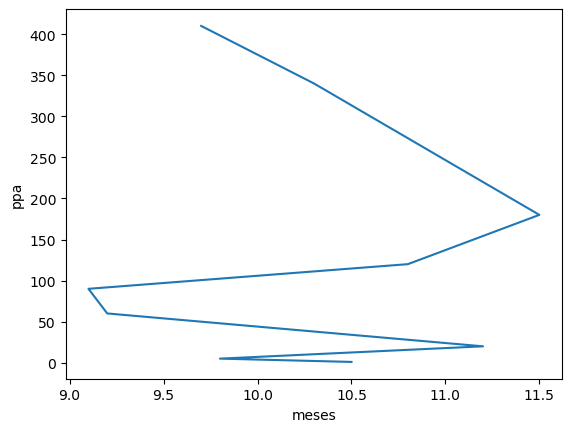

In [88]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel('meses')
plt.ylabel('ppa')
plt.show()

In [89]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(x)

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(features,y)
features

array([[  1.  ,  10.5 , 110.25],
       [  1.  ,   9.8 ,  96.04],
       [  1.  ,  11.2 , 125.44],
       [  1.  ,   9.2 ,  84.64],
       [  1.  ,   9.1 ,  82.81],
       [  1.  ,  10.8 , 116.64],
       [  1.  ,  11.5 , 132.25],
       [  1.  ,  11.2 , 125.44],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,   9.7 ,  94.09]])

Predecir las mismas x para comparar

In [41]:
y_pred = model.predict(features)
y_pred

array([136.05963383, 233.91174201, 120.79724236,  85.13217792,
        77.18885532,  87.65683785, 180.40426019, 120.79724236,
       183.99664305, 220.05536569])

In [42]:
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
import numpy as np


rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print('rmse: ', rmse)
print('r2: ', r2)
print('mae: ', mean_absolute_error(y, y_pred))
print('mse: ', mean_squared_error(y, y_pred))

rmse:  123.65313111739371
r2:  0.15958186933667484
mae:  98.06101120337844
mse:  15290.096835135362


In [47]:
model.predict([[50]])

ValueError: X has 1 features, but LinearRegression is expecting 6 features as input.